In [101]:
# Importing libraries for data analysis and machine learning

import pandas as pd                                  # For data manipulation and analysis
import numpy as np                                   # For numerical operations and handling arrays
import matplotlib.pyplot as plt                      # For creating visualizations and plots
import seaborn as sns                                # For advanced statistical visualizations
from sklearn.ensemble import RandomForestClassifier  # For building a random forest classification model
from sklearn.svm import SVC                          # For building a support vector machine classifier
from sklearn.linear_model import LogisticRegression  # For building a logistic regression classifier

In [102]:
# Importing additional libraries for model evaluation, data scaling, and optimization

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [103]:
# Loading the dataset into a Pandas DataFrame

df = pd.read_csv('C:/Users/ladga/OneDrive - Case Western Reserve University/Desktop/Projects/Credit Risk Analysis/bankloans.csv')

In [104]:
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [105]:
# Checking the data types of each column in the DataFrame

print(df.dtypes)

age           int64
ed            int64
employ        int64
address       int64
income        int64
debtinc     float64
creddebt    float64
othdebt     float64
default     float64
dtype: object


In [106]:
# Checking for missing values in the DataFrame

df.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     450
dtype: int64

In [107]:
# Counting unique values in the DataFrame

df.value_counts()

age  ed  employ  address  income  debtinc  creddebt  othdebt    default
20   1   4       0        14      9.7      0.200984  1.157016   1.0        1
39   1   10      4        31      4.8      0.184512  1.303488   0.0        1
         0       8        39      7.9      1.066026  2.014974   0.0        1
         2       15       22      23.1     1.915914  3.166086   1.0        1
         4       9        38      6.5      1.178190  1.291810   0.0        1
                                                                          ..
30   2   8       4        56      6.4      0.333312  3.250688   0.0        1
         10      4        22      16.1     1.409716  2.132284   0.0        1
         12      9        68      20.1     2.856612  10.811388  0.0        1
                          98      7.2      2.935296  4.120704   0.0        1
56   1   11      20       59      15.0     4.672800  4.177200   0.0        1
Length: 700, dtype: int64

In [108]:
# Checking for missing values in the DataFrame

df.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     450
dtype: int64

In [109]:
# Dropping rows with missing values from the DataFrame

df= df.dropna()

In [110]:
# Checking for missing values in the DataFrame after dropping rows

df.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

<AxesSubplot:xlabel='age', ylabel='income'>

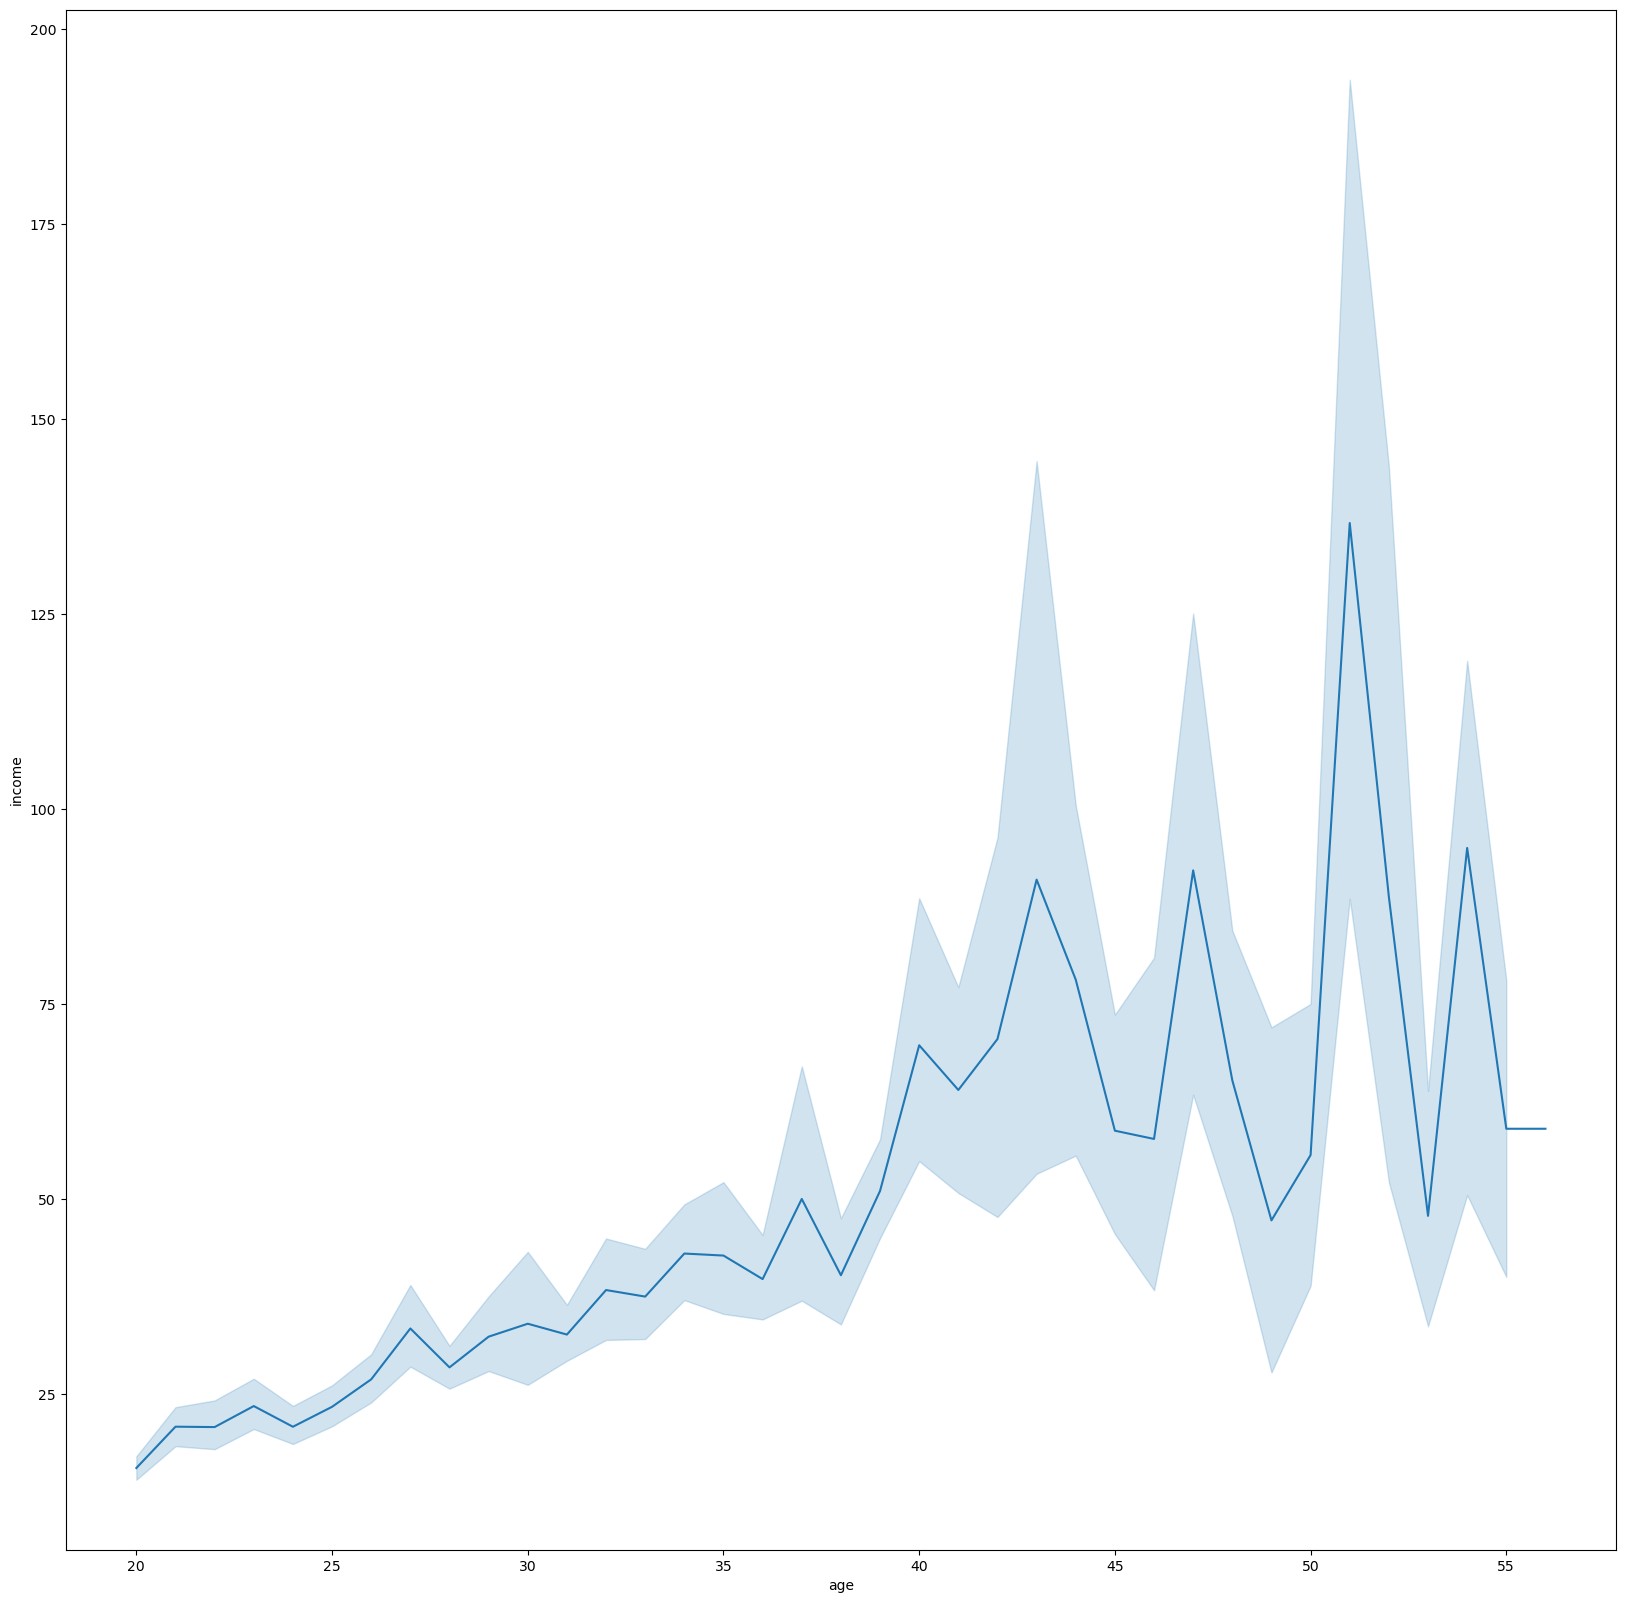

In [111]:
# Creating a line plot to visualize the relationship between age and income

fig, ax = plt.subplots(figsize=(20, 20))           # Setting the figure size
sns.lineplot(x='age', y='income', data=df, ax=ax)  # Creating the line plot

<AxesSubplot:xlabel='age', ylabel='othdebt'>

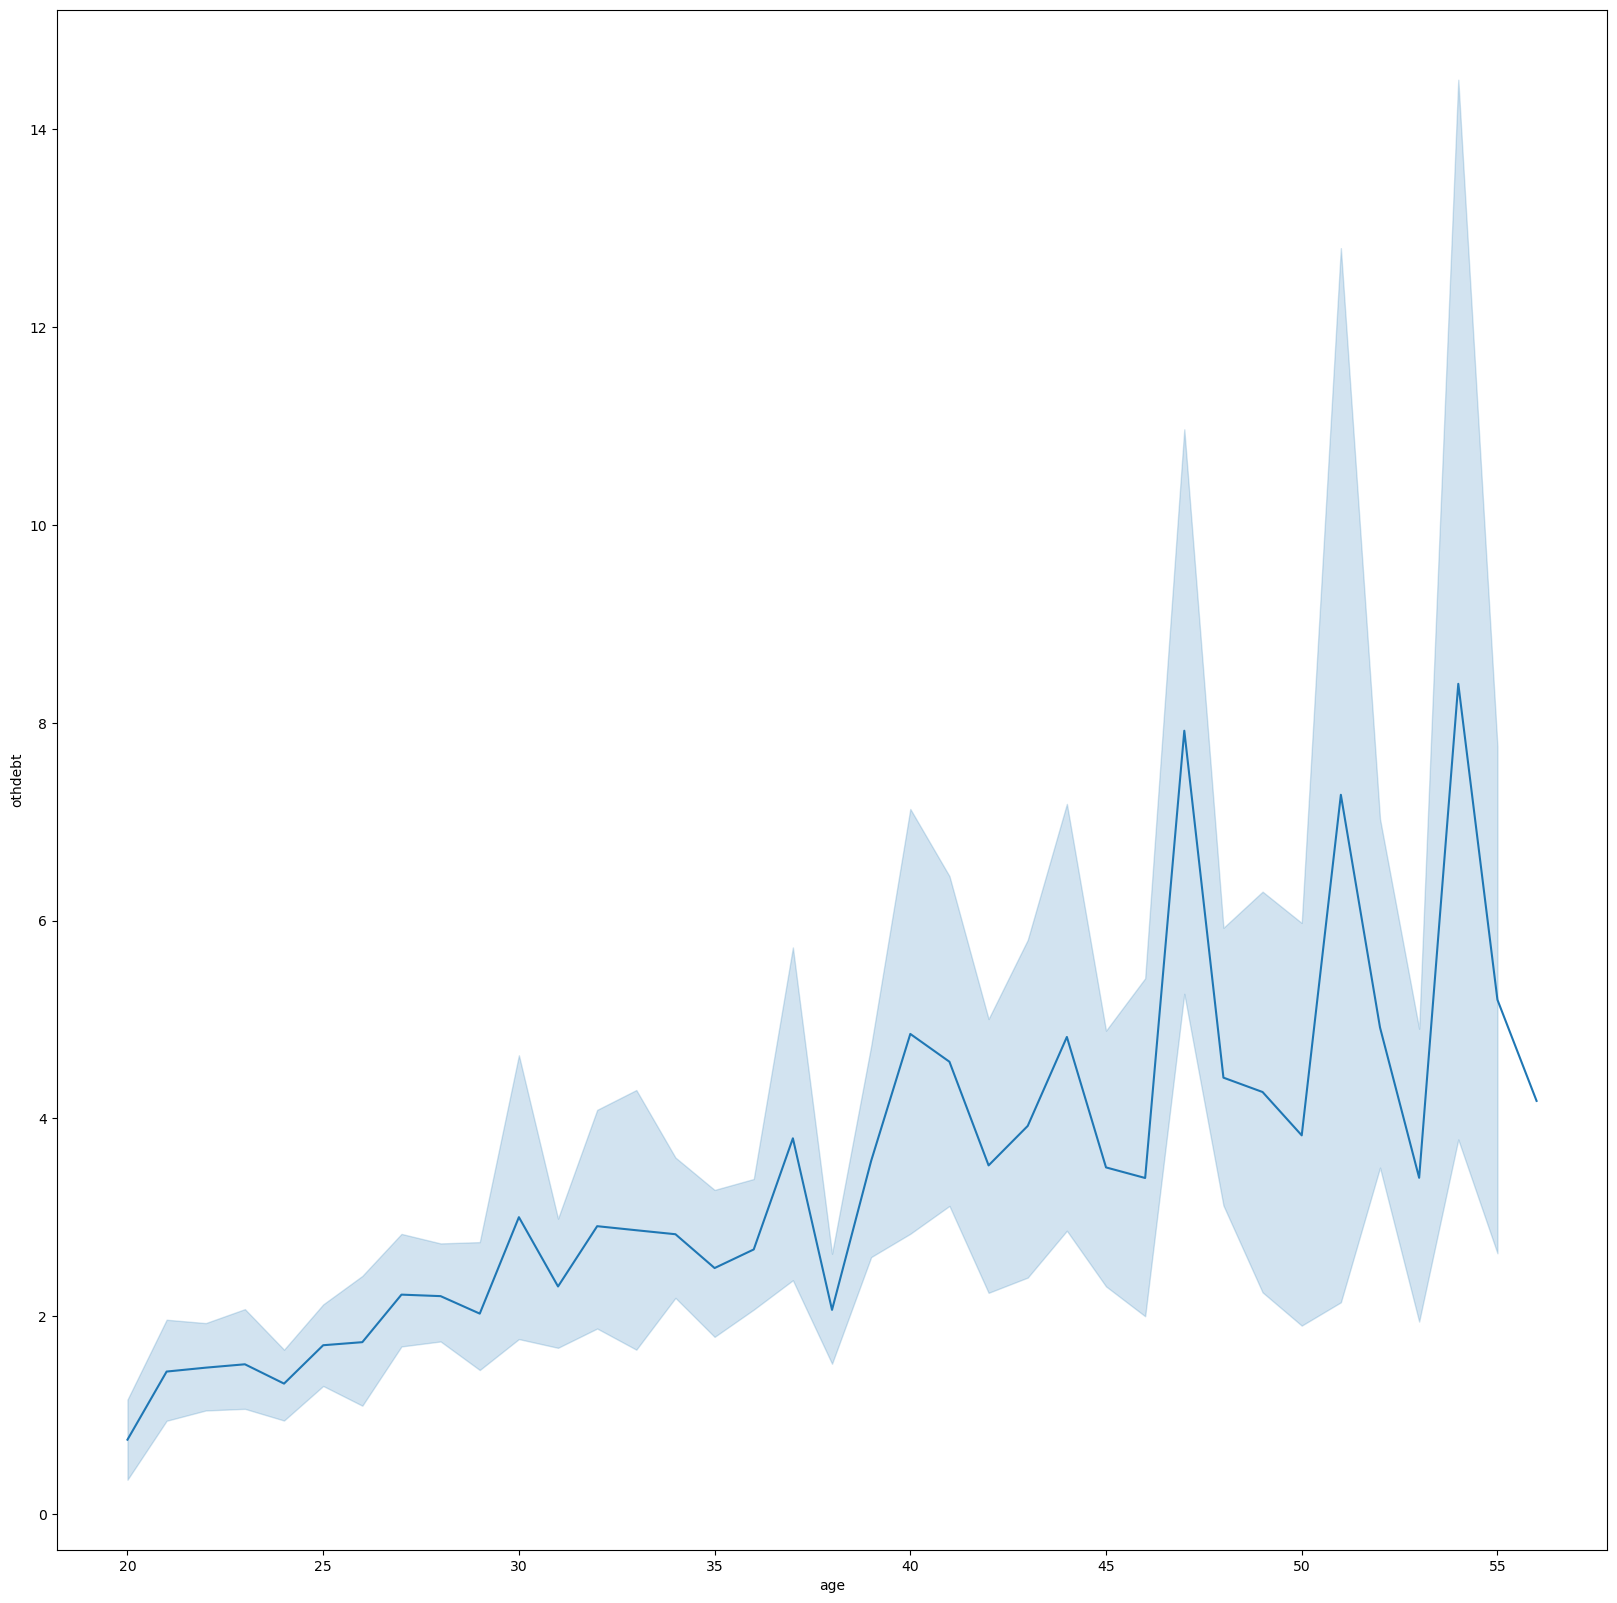

In [112]:
# Creating a line plot to visualize the relationship between age and other debt

fig, ax = plt.subplots(figsize=(20, 20))            # Setting the figure size
sns.lineplot(x='age', y='othdebt', data=df, ax=ax)  # Creating the line plot

In [113]:
# Preparing the feature set (X) and target variable (y)

x = df.drop(['default'], axis=1)   # Features: all columns except 'default'
y = df['default']                  # Target: 'default' column

In [114]:
# Splitting the dataset into training and testing sets

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [115]:
# Standardizing the features

sc = StandardScaler()               # Create a StandardScaler instance
xtrain = sc.fit_transform(xtrain)   # Fit to the training data and transform it
xtest = sc.fit_transform(xtest)     # Fit to the testing data and transform it

In [116]:
# **creating Machine Learning Model**
#Random Forest#

In [117]:
# Initializing the Random Forest Classifier

rfc = RandomForestClassifier(n_estimators=200)

In [118]:
# Fitting the Random Forest Classifier to the training data

rfc.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=200)

In [119]:
# Evaluating the Random Forest Classifier on the test data

rfc.score(xtest,ytest)

0.8

In [120]:
# Performing cross-validation on the Random Forest Classifier

rfc2 = cross_val_score(estimator=rfc, X=xtrain, y=ytrain, cv=10)  # 10-fold cross-validation
rfc2.mean()                                       # Calculating the mean accuracy across all folds

0.7821428571428573

In [121]:
#Support Vector Machine (SVM

In [122]:
# Initializing the Support Vector Classifier
sv = SVC()

# Fitting the SVC to the training data
sv.fit(xtrain, ytrain)

SVC()

In [123]:
# Evaluating the SVC on the test data

sv.score(xtest, ytest)

0.7928571428571428

In [124]:
# Setting up the model with GridSearchCV

model = GridSearchCV(sv, {
    'C':[0.1,0.2,0.4,0.8,1.2,1.8,4,7],   # Regularization parameter
    'gamma':[0.1,0.4,0.8,1.0,2.0,3.0],   # Kernel coefficient
    'kernel':['rbf','linear']            # Types of kernels to evaluate
},scoring='accuracy', cv=10)             # Metric to optimize / # Number of cross-validation folds

In [125]:
# Fitting the GridSearchCV model to the training data

model.fit(xtrain,ytrain)


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.4, 0.8, 1.2, 1.8, 4, 7],
                         'gamma': [0.1, 0.4, 0.8, 1.0, 2.0, 3.0],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [126]:
# Retrieve the best parameters

model.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [127]:
# Initialize the SVC model with specific hyperparameters
model2 = SVC(C=0.1,gamma=0.1,kernel='linear')

# Fit the model to the training data
model2.fit(xtrain,ytrain)

# Evaluate the model on the test data and get the accuracy score
model2.score(xtest,ytest)

0.8214285714285714

In [128]:
# Initialize the Logistic Regression model
lr = LogisticRegression()

# Fit the model to the training data
lr.fit(xtrain,ytrain)

# Evaluate the model on the test data and get the accuracy score
lr.score(xtest,ytest)

0.8357142857142857

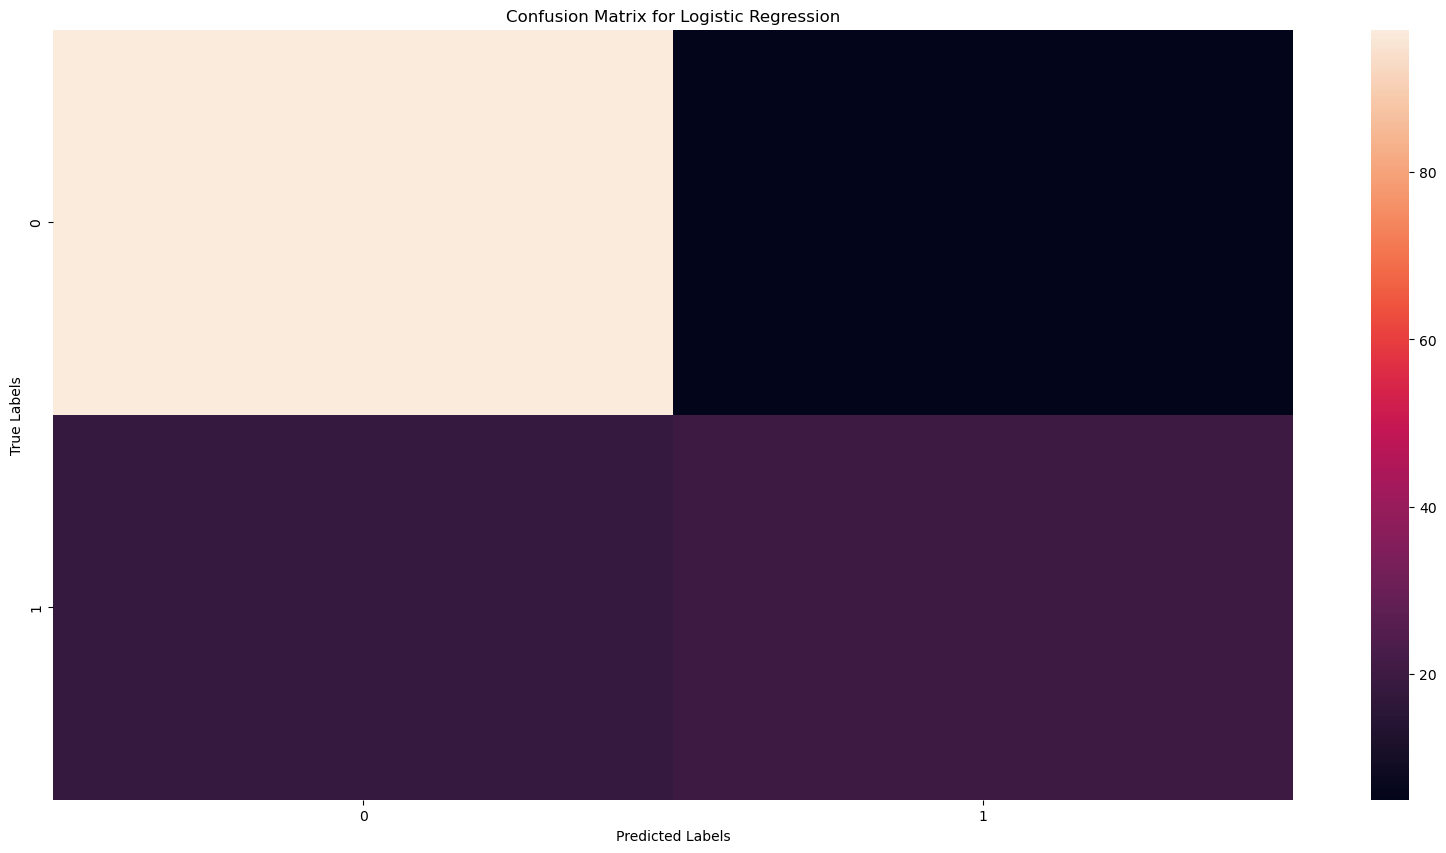

In [130]:
# Make predictions with the Logistic Regression model
yp= lr.predict(xtest)

# Calculate the confusion matrix
c= confusion_matrix(ytest,yp)

# Set up the figure for the heatmap
fig ,ax = plt.subplots(figsize=(20,10))

# Create a heatmap for the confusion matrix
sns.heatmap(c, ax=ax)

# Set labels and titles
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix for Logistic Regression')

# Show the plot
plt.show()